In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
# Loading stocks & cryptos from csv into a dataframe
xom_data = pd.read_csv('XOM.csv',index_col='Date',parse_dates=True)
aapl_data = pd.read_csv('AAPL.csv',index_col='Date',parse_dates=True)
fb_data = pd.read_csv('FB.csv',index_col='Date',parse_dates=True)
wmt_data = pd.read_csv('WMT.csv',index_col='Date',parse_dates=True)

btc_data = pd.read_csv('BTC-USD.csv',index_col='Date',parse_dates=True)
doge_data = pd.read_csv('DOGE-USD.csv',index_col='Date',parse_dates=True)

sp500_data = pd.read_csv('SPY.csv',index_col='Date',parse_dates=True)

sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-01,195.009995,198.210007,194.449997,198.110001,179.284378,141799700
2016-03-02,197.740005,199.059998,197.250000,199.000000,180.089752,102415000
2016-03-03,198.789993,199.800003,198.110001,199.779999,180.795654,95172200
2016-03-04,200.009995,201.350006,199.029999,200.429993,181.383881,129293600
2016-03-07,199.339996,201.070007,199.250000,200.589996,181.528702,100219000


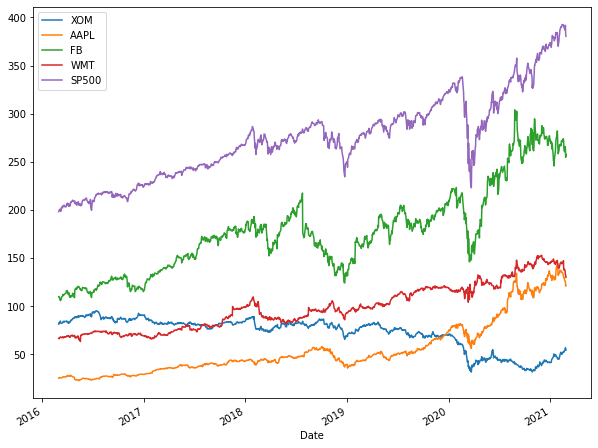

In [3]:
# Stocks Plot
xom_data['Close'].plot(label='XOM',figsize=(10,8))
aapl_data['Close'].plot(label='AAPL',figsize=(10,8))
fb_data['Close'].plot(label='FB',figsize=(10,8))
wmt_data['Close'].plot(label='WMT',figsize=(10,8))
sp500_data['Close'].plot(label='SP500',figsize=(10,8))

plt.legend()

Text(0.5, 1.0, 'Cumulative Return')

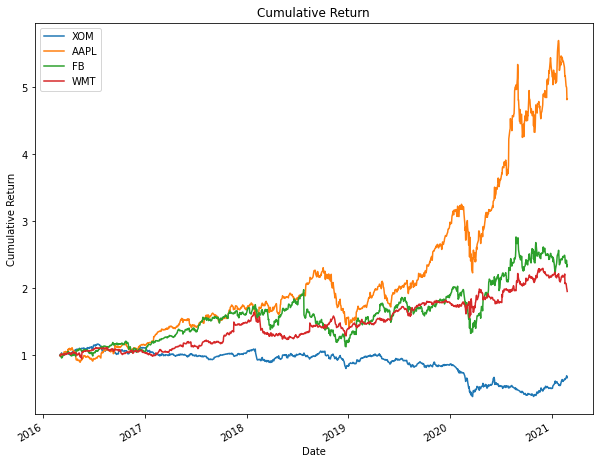

In [4]:
# Normalized Stocks 
xom_data['Cumulative'] = xom_data['Close']/xom_data['Close'].iloc[0]
aapl_data['Cumulative'] = aapl_data['Close']/aapl_data['Close'].iloc[0]
fb_data['Cumulative'] = fb_data['Close']/fb_data['Close'].iloc[0]
wmt_data['Cumulative'] = wmt_data['Close']/wmt_data['Close'].iloc[0]
#sp500_data['Cumulative'] = sp500_data['Close']/sp500_data['Close'].iloc[0]

xom_data['Cumulative'].plot(label='XOM',figsize=(10,8))
aapl_data['Cumulative'].plot(label='AAPL',figsize=(10,8))
fb_data['Cumulative'].plot(label='FB',figsize=(10,8))
wmt_data['Cumulative'].plot(label='WMT',figsize=(10,8))
#sp500_data['Cumulative'].plot(label='SP500',figsize=(10,8))

plt.ylabel("Cumulative Return")
plt.legend()
plt.title('Cumulative Return')

Text(0.5, 1.0, 'Cumulative Return')

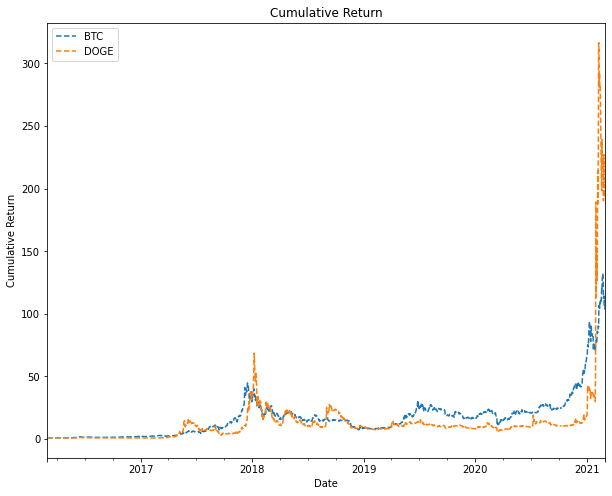

In [5]:
# Commulative return Crypto
btc_data['Cumulative'] = btc_data['Close']/btc_data['Close'].iloc[0]
doge_data['Cumulative'] = doge_data['Close']/doge_data['Close'].iloc[0]

#sp500_data['Cumulative'] = sp500_data['Close']/sp500_data['Close'].iloc[0]


btc_data['Cumulative'].plot(linestyle = 'dashed', label='BTC',figsize=(10,8))
doge_data['Cumulative'].plot(linestyle = 'dashed',label='DOGE',figsize=(10,8))

#sp500_data['Cumulative'].plot(label='SP500',figsize=(10,8))

plt.ylabel("Cumulative Return")
plt.legend()
plt.title('Cumulative Return')

/Users/estebanugartedaza/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


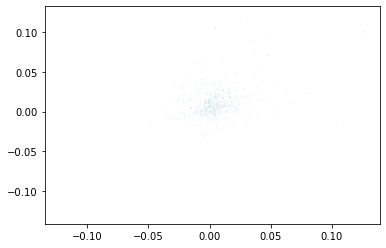

In [6]:
# Calculate Daily return
xom_data['Daily Return'] = xom_data['Close'].pct_change(1)
aapl_data['Daily Return'] = aapl_data['Close'].pct_change(1)
fb_data['Daily Return'] = fb_data['Close'].pct_change(1)
wmt_data['Daily Return'] = wmt_data['Close'].pct_change(1)

btc_data['Daily Return'] = btc_data['Close'].pct_change(1)
doge_data['Daily Return'] = doge_data['Close'].pct_change(1)

sp500_data['Daily Return'] = sp500_data['Close'].pct_change(1)

plt.scatter(xom_data['Daily Return'],aapl_data['Daily Return'],fb_data['Daily Return'],wmt_data['Daily Return'],alpha=0.3)

In [7]:
stocks_daily_return = pd.concat([xom_data['Daily Return'],aapl_data['Daily Return'],fb_data['Daily Return'],wmt_data['Daily Return'], sp500_data['Daily Return']],axis=1)
stocks_daily_return.columns = ['xom','aapl','fb','wmt', 'sp500']

crypto_daily_return = pd.concat([xom_data['Daily Return'],aapl_data['Daily Return'],fb_data['Daily Return'],wmt_data['Daily Return'],btc_data['Daily Return'],doge_data['Daily Return'], sp500_data['Daily Return']],axis=1)
crypto_daily_return.columns = ['xom','aapl','fb','wmt','BTC','DOGE', 'sp500']

#stocks_daily_return.head()

crypto_daily_return.describe()

,xom,aapl,fb,wmt,BTC,DOGE,sp500
count,1257.000000,1257.000000,1257.000000,1257.000000,1826.000000,1826.000000,1257.000000
mean,-0.000153,0.001432,0.000884,0.000631,0.003401,0.005972,0.000589
std,0.018294,0.018929,0.020179,0.014035,0.039935,0.095747,0.011806
min,-0.122248,-0.128647,-0.189609,-0.101832,-0.371695,-0.402570,-0.109424
25%,-0.007778,-0.006134,-0.007284,-0.005363,-0.011579,-0.020027,-0.002933
50%,-0.000117,0.000951,0.001165,0.000530,0.002284,0.000000,0.000677
75%,0.007262,0.010018,0.010861,0.006397,0.018248,0.018494,0.005414
max,0.126868,0.119808,0.108164,0.117085,0.252472,2.756432,0.090603


In [8]:
stocks_daily_return = stocks_daily_return.dropna(subset=['xom','aapl','fb','wmt', 'sp500'], axis=0, how='any')

crypto_daily_return = crypto_daily_return.dropna(subset=['xom','aapl','fb','wmt','BTC','DOGE', 'sp500'], axis=0, how='any')

stocks_daily_return.head()

,xom,aapl,fb,wmt,sp500
Date,,,,,
2016-03-02,0.017470,0.002188,0.001184,-0.003762,0.004492
2016-03-03,-0.003628,0.007444,-0.003365,-0.001057,0.003920
2016-03-04,-0.001335,0.014877,-0.010860,0.009676,0.003254
2016-03-07,0.026370,-0.011067,-0.024541,0.016622,0.000798
2016-03-08,-0.021667,-0.008246,0.001892,0.002209,-0.010918


<AxesSubplot:>

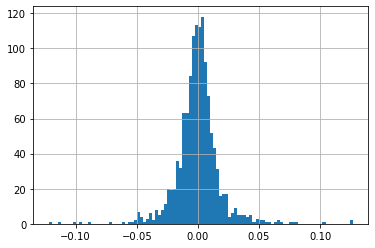

In [9]:
# Histograms stocks
xom_data['Daily Return'].hist(bins=100)

<AxesSubplot:>

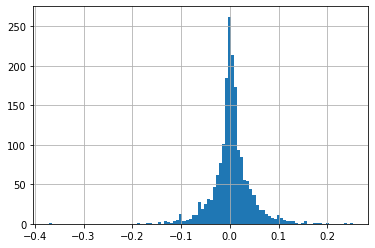

In [10]:
# Histograms cryptos
btc_data['Daily Return'].hist(bins=100)

In [11]:
# CAPM Stocks
beta = {}
alpha = {}

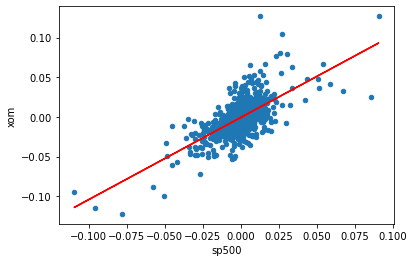

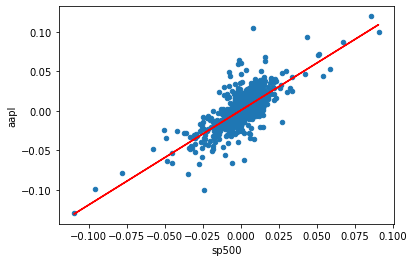

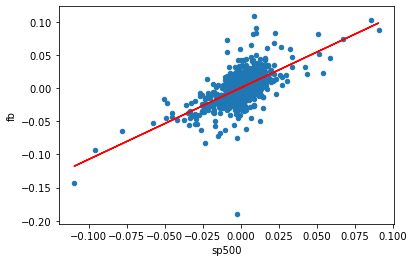

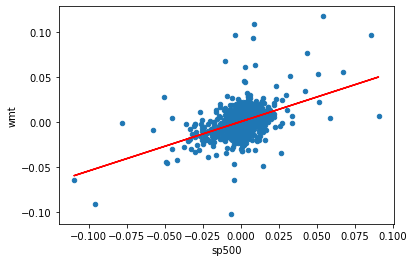

In [12]:
for i in stocks_daily_return.columns:
  if i != 'Date' and i != 'sp500':
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')  
    beta[i] = b    
    alpha[i] = a  
    plt.show()

In [13]:
print(beta)
print(alpha)

{'xom': 1.0357343376594996, 'aapl': 1.1966452554230926, 'fb': 1.0780064510733431, 'wmt': 0.5461054566055562}
{'xom': -0.0007628455105129559, 'aapl': 0.0007269502505891437, 'fb': 0.00024916140908201834, 'wmt': 0.0003091419516625664}


In [14]:
# CAPM for the portfolio
keys = list(beta.keys())
ER = {}
rf = 0.4
rm = stocks_daily_return['sp500'].mean() * 252 

In [15]:
for i in keys:
  ER[i] = rf + (beta[i] * (rm-rf)) 

In [16]:
for i in keys:
    print('Expected Return based on CAPM for {} is {}%'. format(i, ER[i]))

Expected Return based on CAPM for xom is 0.13949441120171852%
Expected Return based on CAPM for aapl is 0.0990224563268794%
Expected Return based on CAPM for fb is 0.12886222358929883%
Expected Return based on CAPM for wmt is 0.2626447744887316%


In [17]:
portfolio_weights = 1/4 * np.ones(4) 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)

print('Expected Return based on CAPM for the portfolio is {}%\n'. format(ER_portfolio))

Expected Return based on CAPM for the portfolio is 0.1575059664016571%



In [18]:
# CAPM Crypto
beta1 = {}
alpha1 = {}

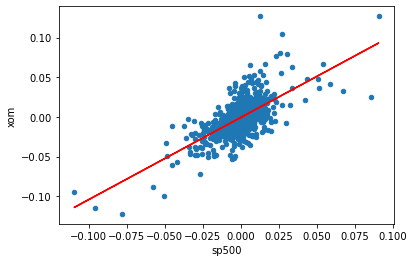

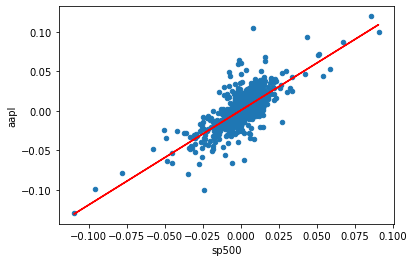

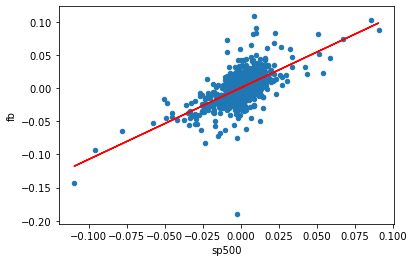

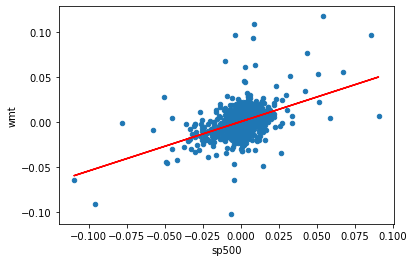

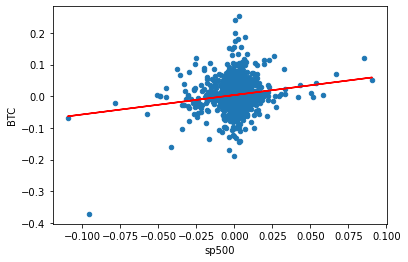

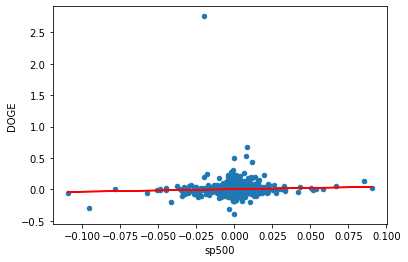

In [19]:
for i in crypto_daily_return.columns:
  if i != 'Date' and i != 'sp500':
    crypto_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    b, a = np.polyfit(crypto_daily_return['sp500'], crypto_daily_return[i], 1)
    plt.plot(crypto_daily_return['sp500'], b * crypto_daily_return['sp500'] + a, '-', color = 'r')  
    beta1[i] = b    
    alpha1[i] = a  
    plt.show()

In [20]:
print(beta1)
print(alpha1)

{'xom': 1.0357343376594996, 'aapl': 1.1966452554230926, 'fb': 1.0780064510733431, 'wmt': 0.5461054566055562, 'BTC': 0.6136378767025324, 'DOGE': 0.39862075810105124}
{'xom': -0.0007628455105129559, 'aapl': 0.0007269502505891437, 'fb': 0.00024916140908201834, 'wmt': 0.0003091419516625664, 'BTC': 0.0036463460666717293, 'DOGE': 0.004446013248764255}


In [21]:
# CAPM for the portfolio
keys_c = list(beta1.keys())
ER_c = {}
rf_c = 0.4
rm_c = crypto_daily_return['sp500'].mean()*252

In [22]:
for i in keys_c:
  ER_c[i] = rf_c + (beta1[i] * (rm_c-rf_c)) 

for i in keys_c:
    print('Expected Return based on CAPM for {} is {}%'. format(i, ER_c[i]))

Expected Return based on CAPM for xom is 0.13949441120171852%
Expected Return based on CAPM for aapl is 0.0990224563268794%
Expected Return based on CAPM for fb is 0.12886222358929883%
Expected Return based on CAPM for wmt is 0.2626447744887316%
Expected Return based on CAPM for BTC is 0.24565917092161368%
Expected Return based on CAPM for DOGE is 0.2997397966635047%


In [23]:
portfolio_weights_c = 1/6 * np.ones(6) 
ER_portfolio_c = sum(list(ER_c.values()) * portfolio_weights_c)

print('Expected Return based on CAPM for the portfolio is {}%\n'. format(ER_portfolio_c))

Expected Return based on CAPM for the portfolio is 0.1959038055319578%



In [24]:
portfolio_weights_c

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [25]:
rm_c

0.1484822320490417